## Ideas for unit testing in pyBDY

Several of these routines have been adapted from pyDOMCFG developed by Mattia Almansi, Diego Druciaferri and James Harle.

In [2]:
import sys
sys.path.insert(1, '/home/joaomorado/git_repos/PyNEMO_MyFork/tests')
from bathymetry import *

In [3]:
# Generate coordinates and bathymetry of parent and child - flat bottom case
ds_bathy_child  = Bathymetry(0.5, 0.5, 20, 20, -10., 45., degrees=45).flat(5.0e3)
ds_bathy_parent = Bathymetry(1., 1., 30, 30, -20., 35.).flat(5.0e3)

In [4]:
# Create some vertical grid information
z3t = xr.DataArray(np.arange(10.,2500.,20.), dims=("z",))
z3w = xr.DataArray(np.arange(0.,2500.,20.), dims=("z",))
e3t = xr.full_like(z3t, 20.)
e3w = xr.full_like(z3t, 20.)

In [5]:
# Merge the vertical grid information with coordinates and bathymetry
ds_domcfg_parent = merge_z3_and_e3(ds_bathy_parent, z3t, z3w, e3t, e3w)
ds_domcfg_child  = merge_z3_and_e3(ds_bathy_child , z3t, z3w, e3t, e3w)

# Generate variables to use as source data
ds_var = generate_variables(ds_domcfg_parent,)

In [7]:
# Save to file
ds_domcfg_parent.to_netcdf('/home/joaomorado/git_repos/PyNEMO_MyFork/parent.nc')
ds_domcfg_child.to_netcdf('/home/joaomorado/git_repos/PyNEMO_MyFork/child_rot45.nc')
ds_var.to_netcdf('/home/joaomorado/git_repos/PyNEMO_MyFork/variables.nc')

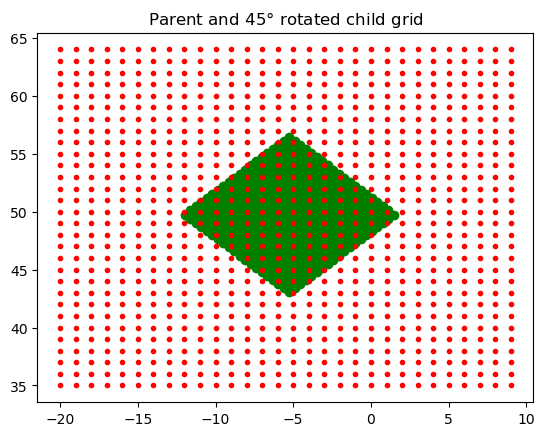

In [8]:
# Does it look ok?
plt.plot(ds_bathy_child.glamt, ds_bathy_child.gphit,'go')
plt.plot(ds_bathy_parent.glamt, ds_bathy_parent.gphit,'r.')
plt.title('Parent and $45\degree$ rotated child grid');

### Other setups to consider

- [ ] flat bottom (parent) -> flat bottom (child) with and without different vertical discretisation (in z and sigma)
- [ ] realistic bathymetry (parent) -> realistic bathymetry (child) with and without different vertical discretisation (in z and sigma)
- [ ] rotation of parent or child grid or both
- [ ] uniform and realistic tracer field